# XID+PACS ELAIS-S1 Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+PACS_GAMA15_cat.fits')


In [3]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J142223.514-020056.824,215.59797439531033,-2.0157844928095976,9.600263,23.14734,2.7141767,20.598145,41.96578,6.6543775,0.001927173,0.0009956617,0.003477207,0.0033170728,0.9991288,0.9991287,2000.0,2000.0,1.0,1.0
HELP_J142225.083-020032.628,215.6045118871889,-2.009063335009292,17.912252,36.807602,5.7873955,67.33961,97.25211,36.88929,0.001927173,0.0009956617,0.003477207,0.0033170728,0.9991537,1.0005065,2000.0,2000.0,1.0,1.0
HELP_J142226.213-020049.089,215.60922062475586,-2.0136359365235745,47.06057,73.61301,22.396208,7.5008,18.632,1.7982856,0.001927173,0.0009956617,0.003477207,0.0033170728,1.0015928,1.0008322,2000.0,2000.0,1.0,1.0
HELP_J142227.429-020022.768,215.61428720579937,-2.006324544465026,14.16578,32.05785,3.9435642,3.6176233,9.696779,0.78176814,0.001927173,0.0009956617,0.003477207,0.0033170728,1.0016396,0.998988,2000.0,2000.0,1.0,1.0
HELP_J142227.569-020021.556,215.6148690701579,-2.0059878200853696,14.860736,31.459297,4.022544,5.2201104,13.0085335,1.2518885,0.001927173,0.0009956617,0.003477207,0.0033170728,0.99847186,1.0000724,2000.0,2000.0,1.0,1.0
HELP_J142228.121-015952.833,215.6171719082149,-1.9980092739460598,15.664055,32.425476,4.540008,34.023926,62.487244,11.489913,0.001927173,0.0009956617,0.003477207,0.0033170728,1.000504,0.9991097,2000.0,2000.0,1.0,1.0
HELP_J142256.271-015823.484,215.7344623809323,-1.9731901250374901,29.504389,63.78562,8.770282,422.00943,797.9182,116.3049,0.0019030639,0.0022681595,0.0044432534,0.0037410911,0.99887264,1.001346,2000.0,2000.0,1.0,0.556
HELP_J142256.720-015830.301,215.73633408967544,-1.9750835496925812,200.84535,467.2949,57.729538,490.32562,835.8261,155.53915,0.0019030639,0.0022681595,0.0044432534,0.0037410911,1.0008161,0.99974376,2000.0,2000.0,1.0,0.231


In [4]:
from astropy import units as u
cat['RA'].unit=u.degree
cat['Dec'].unit=u.degree

## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


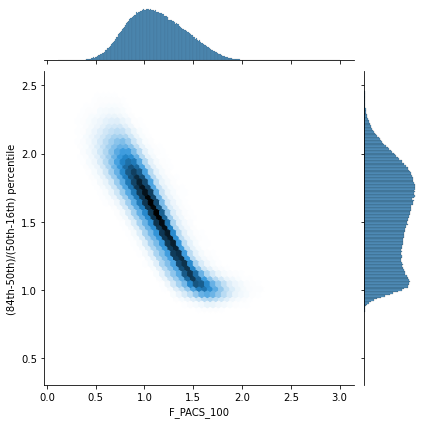

In [9]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 2.5 
n_use=skew> 2.5
g=sns.jointplot(x=np.log10(cat['F_PACS_100'][use]),y=skew[use], kind='hex')

g.savefig('../../data/figs/sk_PACS100_GAMA-15.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS100_GAMA-15.pdf', bbox='tight')

In [10]:
10.0**1.3

19.952623149688797

For 100 $\mathrm{\mu m}$ depth is ~ 16mJy

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


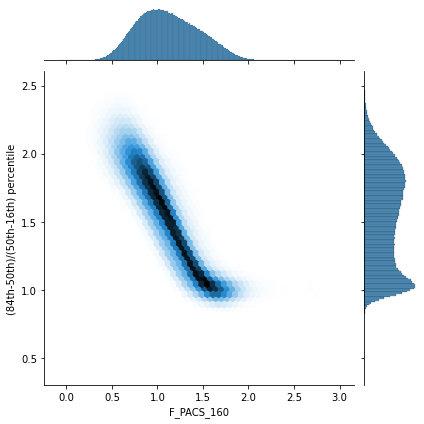

In [11]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 2.5
g=sns.jointplot(x=np.log10(cat['F_PACS_160'][use]),y=skew[use], kind='hex')

g.savefig('../../data/figs/sk_PACS160_GAMA-15.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS160_GAMA-15.pdf', bbox='tight')

For 160 $\mathrm{\mu m}$ depth is ~ 30mJy

## Add flag to catalogue

In [8]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))



In [9]:
ind_100=(cat['F_PACS_100'] < 20)
ind_160=(cat['F_PACS_160'] < 30) 


In [10]:
print(ind_100.sum(),ind_160.sum(),len(cat))

169768 158225 194276


In [11]:
cat['flag_PACS_100'][ind_100]=True
cat['flag_PACS_160'][ind_160]=True


In [12]:
cat.write('./data/dmu26_XID+PACS_ELAIS-S1_cat_20180416.fits', format='fits',overwrite=True)


### Check Map

In [ ]:
from astropy.io import fits
import pylab as plt

In [ ]:
PACS_pval=fits.open('./data/dmu26_XID+PACS_100_Bayes_Pval.fits')
plt.hist(PACS_pval[1].data[np.isfinite(PACS_pval[1].data)],bins=np.arange(-6,6,0.05));